In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Burberry.csv')
data

,year_ended,revenue,adjustedoperating_profit,adjusteddiluted_eps,profit_after_tax,operating_profit,dividendper_share
0,2013,1999,428,70.0,259.2,346,29.0
1,2014,2330,460,75.4,332.3,445,32.0
2,2015,2523,455,76.9,341.1,440,35.2
3,2016,2515,418,69.9,314.6,403,37.0
4,2017,2766,459,77.4,287.7,394,38.9
5,2018,2733,467,82.1,293.6,410,41.3
6,2019,2720,438,82.1,339.1,437,42.5
7,2020,2633,433,78.7,121.6,189,11.3
8,2021,2344,396,67.3,376.0,521,42.5
9,2022,2826,523,94.0,397.0,543,47.0


In [ ]:
X = data.iloc[:, 0:1].values
y = data.iloc[:, 1:2].values

In [ ]:
print(X)
print(y)

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]
[[1999]
 [2330]
 [2523]
 [2515]
 [2766]
 [2733]
 [2720]
 [2633]
 [2344]
 [2826]]


## Revenue prediction using Simple Linear Regression with Least Squares Method

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

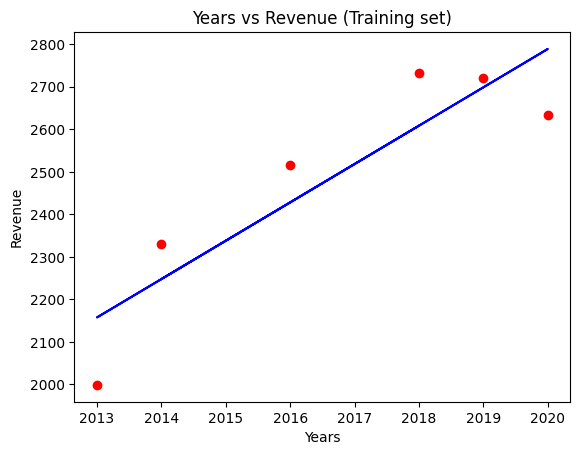

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Years vs Revenue (Training set)')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.show()

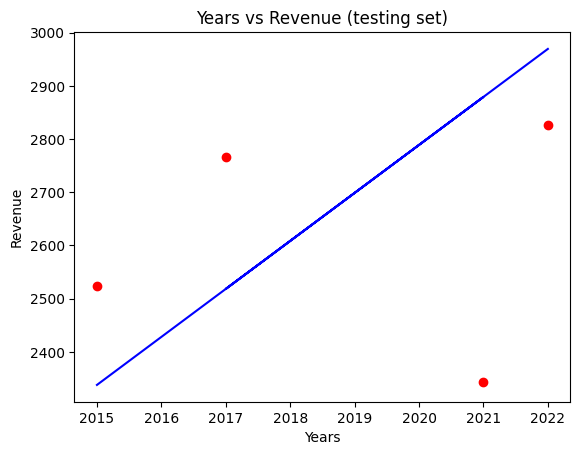

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Years vs Revenue (testing set)')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

[52.56363636] [-103508.23636364]


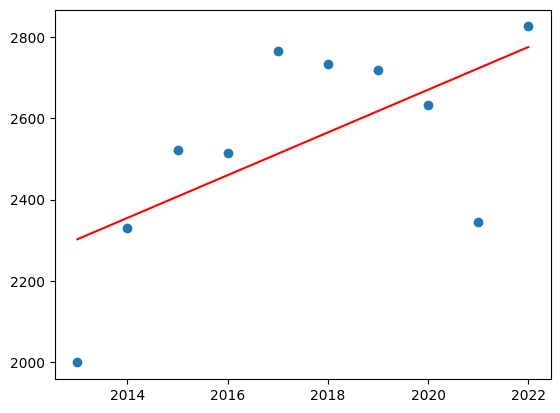

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Profit prediction using Multiple Linear Regression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Burberry - Burberry (2).csv')
df

,year_ended,revenue,adjustedoperating_profit,adjusteddiluted_eps,profit_after_tax,operating_profit,dividendper_share,Cost of sales,Operating expenses,Adjusting operating items,Net finance (charge)/credit,Taxation
0,2013,1999,428,70.0,259.2,346,29.0,-556.7,-1013.9,-77.1,-0.3,-91.5
1,2014,2330,460,75.4,332.3,445,32.0,-671.3,-1198.2,-16.6,0.7,-112.1
2,2015,2523,455,76.9,341.1,440,35.2,-757.7,-1310.3,-11.2,0.6,-103.5
3,2016,2515,418,69.9,314.6,403,37.0,-752.0,-1344.9,-5.0,2.8,-101.0
4,2017,2766,459,77.4,287.7,394,38.9,-833.0,-1474.0,-65.0,1.0,-107.0
5,2018,2733,467,82.1,293.6,410,41.3,-836.0,-1430.0,-57.0,3.0,-119.0
6,2019,2720,438,82.1,339.1,437,42.5,-859.0,-1423.0,-1.0,4.0,-102.0
7,2020,2633,433,78.7,121.6,189,11.3,-859.0,-1341.0,-244.0,-20.0,-47.0
8,2021,2344,396,67.3,376.0,521,42.5,-704.0,-1244.0,125.0,-31.0,-114.0
9,2022,2826,523,94.0,397.0,543,47.0,-831.0,-1472.0,20.0,-32.0,-114.0


In [ ]:
df = df[['adjustedoperating_profit','adjusteddiluted_eps','operating_profit','dividendper_share','year_ended','revenue','Cost of sales','Operating expenses','Adjusting operating items','Net finance (charge)/credit','Taxation','profit_after_tax']]
df

,adjustedoperating_profit,adjusteddiluted_eps,operating_profit,dividendper_share,year_ended,revenue,Cost of sales,Operating expenses,Adjusting operating items,Net finance (charge)/credit,Taxation,profit_after_tax
0,428,70.0,346,29.0,2013,1999,-556.7,-1013.9,-77.1,-0.3,-91.5,259.2
1,460,75.4,445,32.0,2014,2330,-671.3,-1198.2,-16.6,0.7,-112.1,332.3
2,455,76.9,440,35.2,2015,2523,-757.7,-1310.3,-11.2,0.6,-103.5,341.1
3,418,69.9,403,37.0,2016,2515,-752.0,-1344.9,-5.0,2.8,-101.0,314.6
4,459,77.4,394,38.9,2017,2766,-833.0,-1474.0,-65.0,1.0,-107.0,287.7
5,467,82.1,410,41.3,2018,2733,-836.0,-1430.0,-57.0,3.0,-119.0,293.6
6,438,82.1,437,42.5,2019,2720,-859.0,-1423.0,-1.0,4.0,-102.0,339.1
7,433,78.7,189,11.3,2020,2633,-859.0,-1341.0,-244.0,-20.0,-47.0,121.6
8,396,67.3,521,42.5,2021,2344,-704.0,-1244.0,125.0,-31.0,-114.0,376.0
9,523,94.0,543,47.0,2022,2826,-831.0,-1472.0,20.0,-32.0,-114.0,397.0


In [ ]:
X = df.iloc[:, 4:11].values
y = df.iloc[:, -1].values
print(X)

[[ 2.01e+03  2.00e+03 -5.57e+02 -1.01e+03 -7.71e+01 -3.00e-01 -9.15e+01]
 [ 2.01e+03  2.33e+03 -6.71e+02 -1.20e+03 -1.66e+01  7.00e-01 -1.12e+02]
 [ 2.02e+03  2.52e+03 -7.58e+02 -1.31e+03 -1.12e+01  6.00e-01 -1.04e+02]
 [ 2.02e+03  2.52e+03 -7.52e+02 -1.34e+03 -5.00e+00  2.80e+00 -1.01e+02]
 [ 2.02e+03  2.77e+03 -8.33e+02 -1.47e+03 -6.50e+01  1.00e+00 -1.07e+02]
 [ 2.02e+03  2.73e+03 -8.36e+02 -1.43e+03 -5.70e+01  3.00e+00 -1.19e+02]
 [ 2.02e+03  2.72e+03 -8.59e+02 -1.42e+03 -1.00e+00  4.00e+00 -1.02e+02]
 [ 2.02e+03  2.63e+03 -8.59e+02 -1.34e+03 -2.44e+02 -2.00e+01 -4.70e+01]
 [ 2.02e+03  2.34e+03 -7.04e+02 -1.24e+03  1.25e+02 -3.10e+01 -1.14e+02]
 [ 2.02e+03  2.83e+03 -8.31e+02 -1.47e+03  2.00e+01 -3.20e+01 -1.14e+02]]


In [ ]:
print(y)

[259.2 332.3 341.1 314.6 287.7 293.6 339.1 121.6 376.  397. ]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  1.00e+00  2.01e+03  2.00e+03 -5.57e+02 -7.71e+01
  -3.00e-01 -9.15e+01]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  1.00e+00  0.00e+00  2.01e+03  2.33e+03 -6.71e+02 -1.66e+01
   7.00e-01 -1.12e+02]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00
   0.00e+00  0.00e+00  0.00e+00  2.02e+03  2.52e+03 -7.58e+02 -1.12e+01
   6.00e-01 -1.04e+02]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  2.02e+03  2.52e+03 -7.52e+02 -5.00e+00
   2.80e+00 -1.01e+02]
 [ 1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  2.02e+03  2.77e+03 -8.33e+02 -6.50e+01
   1.00e+00 -1.07e+02]
 [ 0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  2.02e+03  2.73e+03 -8.36e+02 -5.70e+01
   3.00e+00 -1.19e+02

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[313.92 341.1 ]
 [427.76 376.  ]
 [261.44 287.7 ]
 [299.08 397.  ]
 [311.82 332.3 ]]


## Revenue prediction using Time Series Regression 

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 150.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
data

,year_ended,revenue,adjustedoperating_profit,adjusteddiluted_eps,profit_after_tax,operating_profit,dividendper_share
0,2013,1999,428,70.0,259.2,346,29.0
1,2014,2330,460,75.4,332.3,445,32.0
2,2015,2523,455,76.9,341.1,440,35.2
3,2016,2515,418,69.9,314.6,403,37.0
4,2017,2766,459,77.4,287.7,394,38.9
5,2018,2733,467,82.1,293.6,410,41.3
6,2019,2720,438,82.1,339.1,437,42.5
7,2020,2633,433,78.7,121.6,189,11.3
8,2021,2344,396,67.3,376.0,521,42.5
9,2022,2826,523,94.0,397.0,543,47.0


In [ ]:
# create 10 year moving average
data['MA10'] = data['revenue'].rolling(2).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(data, x="year_ended", y=["revenue", "MA10"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
data['Series'] = np.arange(1,len(data)+1)
# drop unnecessary columns and re-arrange
data.drop(['adjustedoperating_profit','adjusteddiluted_eps','profit_after_tax','operating_profit','dividendper_share'],axis=1, inplace=True)
data = data[['Series','year_ended','revenue','MA10']]
# check the head of the dataset
data

,Series,year_ended,revenue,MA10
0,1,2013,1999,NaN
1,2,2014,2330,2164.5
2,3,2015,2523,2426.5
3,4,2016,2515,2519.0
4,5,2017,2766,2640.5
5,6,2018,2733,2749.5
6,7,2019,2720,2726.5
7,8,2020,2633,2676.5
8,9,2021,2344,2488.5
9,10,2022,2826,2585.0


In [ ]:
# split data into train-test set manually
train = data[data['year_ended'] < 2019]
test = data[data['year_ended'] >= 2019]
# check shape
train.shape, test.shape

((6, 4), (4, 4))

In [ ]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test, target = 'revenue', fold_strategy = 'timeseries', numeric_features = ['year_ended', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,revenue
2,Target type,Regression
3,Original data shape,"(10, 4)"
4,Transformed data shape,"(10, 4)"
5,Transformed train set shape,"(6, 4)"
6,Transformed test set shape,"(4, 4)"
7,Numeric features,2
8,Rows with missing values,10.0%
9,Preprocess,True


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,137.2337,46190.5624,137.2337,nan,0.0530,0.0498,0.1233
lightgbm,Light Gradient Boosting Machine,285.8987,86176.9652,285.8987,nan,0.1126,0.1063,0.1067
dummy,Dummy Regressor,285.8987,86176.9636,285.8987,nan,0.1126,0.1063,0.1100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,470512955362364.7500,238249237904644482762920689664.0000,488107813812322.1250,-13.1253,25.8283,1.0000


In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=data)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2012', periods=len(predictions), freq = 'BA')
# predictions['year_ended'] = pd.date_range(start='2013-03-31', periods=len(predictions), freq='A')
# line plot
fig = px.line(predictions, x='Date', y=["revenue","MA10"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2018", x1="2022", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,413650253389629.3125,193555243752195739848955396096.0000,439949137687751.0625,-7.6221,25.7212,1.0000


In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2022', end = '2028', freq = 'BY')
future_df = pd.DataFrame()
future_df['year_ended'] = ['2022','2023','2024','2025','2026','2027']    
future_df['Series'] = np.arange(145,(145+len(future_dates)))
future_df.head()

,year_ended,Series
0,2022,145
1,2023,146
2,2024,147
3,2025,148
4,2026,149


In [ ]:
print(future_df.columns)


Index(['year_ended', 'Series'], dtype='object')


In [ ]:
future_df['MA10'] = data['revenue'].rolling(2).mean()

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,year_ended,Series,MA10,prediction_label
0,2022,145,NaN,2520.593262
1,2023,146,2164.5,2527.901611
2,2024,147,2426.5,2527.901611
3,2025,148,2519.0,2566.026367
4,2026,149,2640.5,2825.999023


In [ ]:
concat_df = pd.concat([data,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2012', end = '2028', freq = 'BA')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["revenue", "prediction_label"], template = 'plotly_dark')
fig.show()

## Profit prediction using Time Series Regression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Burberry.csv')
data

,year_ended,revenue,adjustedoperating_profit,adjusteddiluted_eps,profit_after_tax,operating_profit,dividendper_share
0,2013,1999,428,70.0,259.2,346,29.0
1,2014,2330,460,75.4,332.3,445,32.0
2,2015,2523,455,76.9,341.1,440,35.2
3,2016,2515,418,69.9,314.6,403,37.0
4,2017,2766,459,77.4,287.7,394,38.9
5,2018,2733,467,82.1,293.6,410,41.3
6,2019,2720,438,82.1,339.1,437,42.5
7,2020,2633,433,78.7,121.6,189,11.3
8,2021,2344,396,67.3,376.0,521,42.5
9,2022,2826,523,94.0,397.0,543,47.0


In [ ]:
# create 10 year moving average
data['MA10'] = data['profit_after_tax'].rolling(2).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(data, x="year_ended", y=["profit_after_tax", "MA10"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
data['Series'] = np.arange(1,len(data)+1)
# drop unnecessary columns and re-arrange
data.drop(['revenue','adjustedoperating_profit','adjusteddiluted_eps','operating_profit','dividendper_share'],axis=1, inplace=True)
data = data[['Series','year_ended','profit_after_tax','MA10']]
# check the head of the dataset
data

,Series,year_ended,profit_after_tax,MA10
0,1,2013,259.2,NaN
1,2,2014,332.3,295.75
2,3,2015,341.1,336.70
3,4,2016,314.6,327.85
4,5,2017,287.7,301.15
5,6,2018,293.6,290.65
6,7,2019,339.1,316.35
7,8,2020,121.6,230.35
8,9,2021,376.0,248.80
9,10,2022,397.0,386.50


In [ ]:
# split data into train-test set manually
train = data[data['year_ended'] < 2019]
test = data[data['year_ended'] >= 2019]
# check shape
train.shape, test.shape

((6, 4), (4, 4))

In [ ]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test, target = 'profit_after_tax', fold_strategy = 'timeseries', numeric_features = ['year_ended', 'Series'], fold = 3, transform_target = True, session_id = 124)

,Description,Value
0,Session id,124
1,Target,profit_after_tax
2,Target type,Regression
3,Original data shape,"(10, 4)"
4,Transformed data shape,"(10, 4)"
5,Transformed train set shape,"(6, 4)"
6,Transformed test set shape,"(4, 4)"
7,Numeric features,2
8,Rows with missing values,10.0%
9,Preprocess,True


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,19.0833,472.7042,19.0833,nan,0.0624,0.0652,0.0633
dummy,Dummy Regressor,19.0833,472.7030,19.0833,nan,0.0624,0.0652,0.0600
xgboost,Extreme Gradient Boosting,19.8223,505.8029,19.8223,nan,0.0634,0.0662,0.0800


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,380026.2636,188041301304.5919,433637.2923,-3.3108,6.8154,0.9974


In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=data)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2012', periods=len(predictions), freq = 'BA')
# predictions['year_ended'] = pd.date_range(start='2013-03-31', periods=len(predictions), freq='A')
# line plot
fig = px.line(predictions, x='Date', y=["profit_after_tax","MA10"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2018", x1="2022", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,340448.4513,137009951227.4828,370148.5529,-5.4919,6.8724,0.9983


In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2022', end = '2028', freq = 'BY')
future_df = pd.DataFrame()
# future_df['Month'] = [i.month for i in future_dates]
# future_df['MA10'] = ['0.0','0.0','0.0','0.0','0.0']
future_df['year_ended'] = ['2022','2023','2024','2025','2026','2027']    
future_df['Series'] = np.arange(145,(145+len(future_dates)))
future_df.head()

,year_ended,Series
0,2022,145
1,2023,146
2,2024,147
3,2025,148
4,2026,149


In [ ]:
future_df['MA10'] = data['profit_after_tax'].rolling(2).mean()

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,year_ended,Series,MA10,prediction_label
0,2022,145,NaN,318.865263
1,2023,146,295.750000,318.865263
2,2024,147,336.700012,318.865263
3,2025,148,327.850006,318.865263
4,2026,149,301.149994,318.865263


In [ ]:
concat_df = pd.concat([data,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2012', end = '2028', freq = 'BA')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["profit_after_tax", "prediction_label"], template = 'plotly_dark')
fig.show()